# Лабораторная работа №2. Премия Оскар

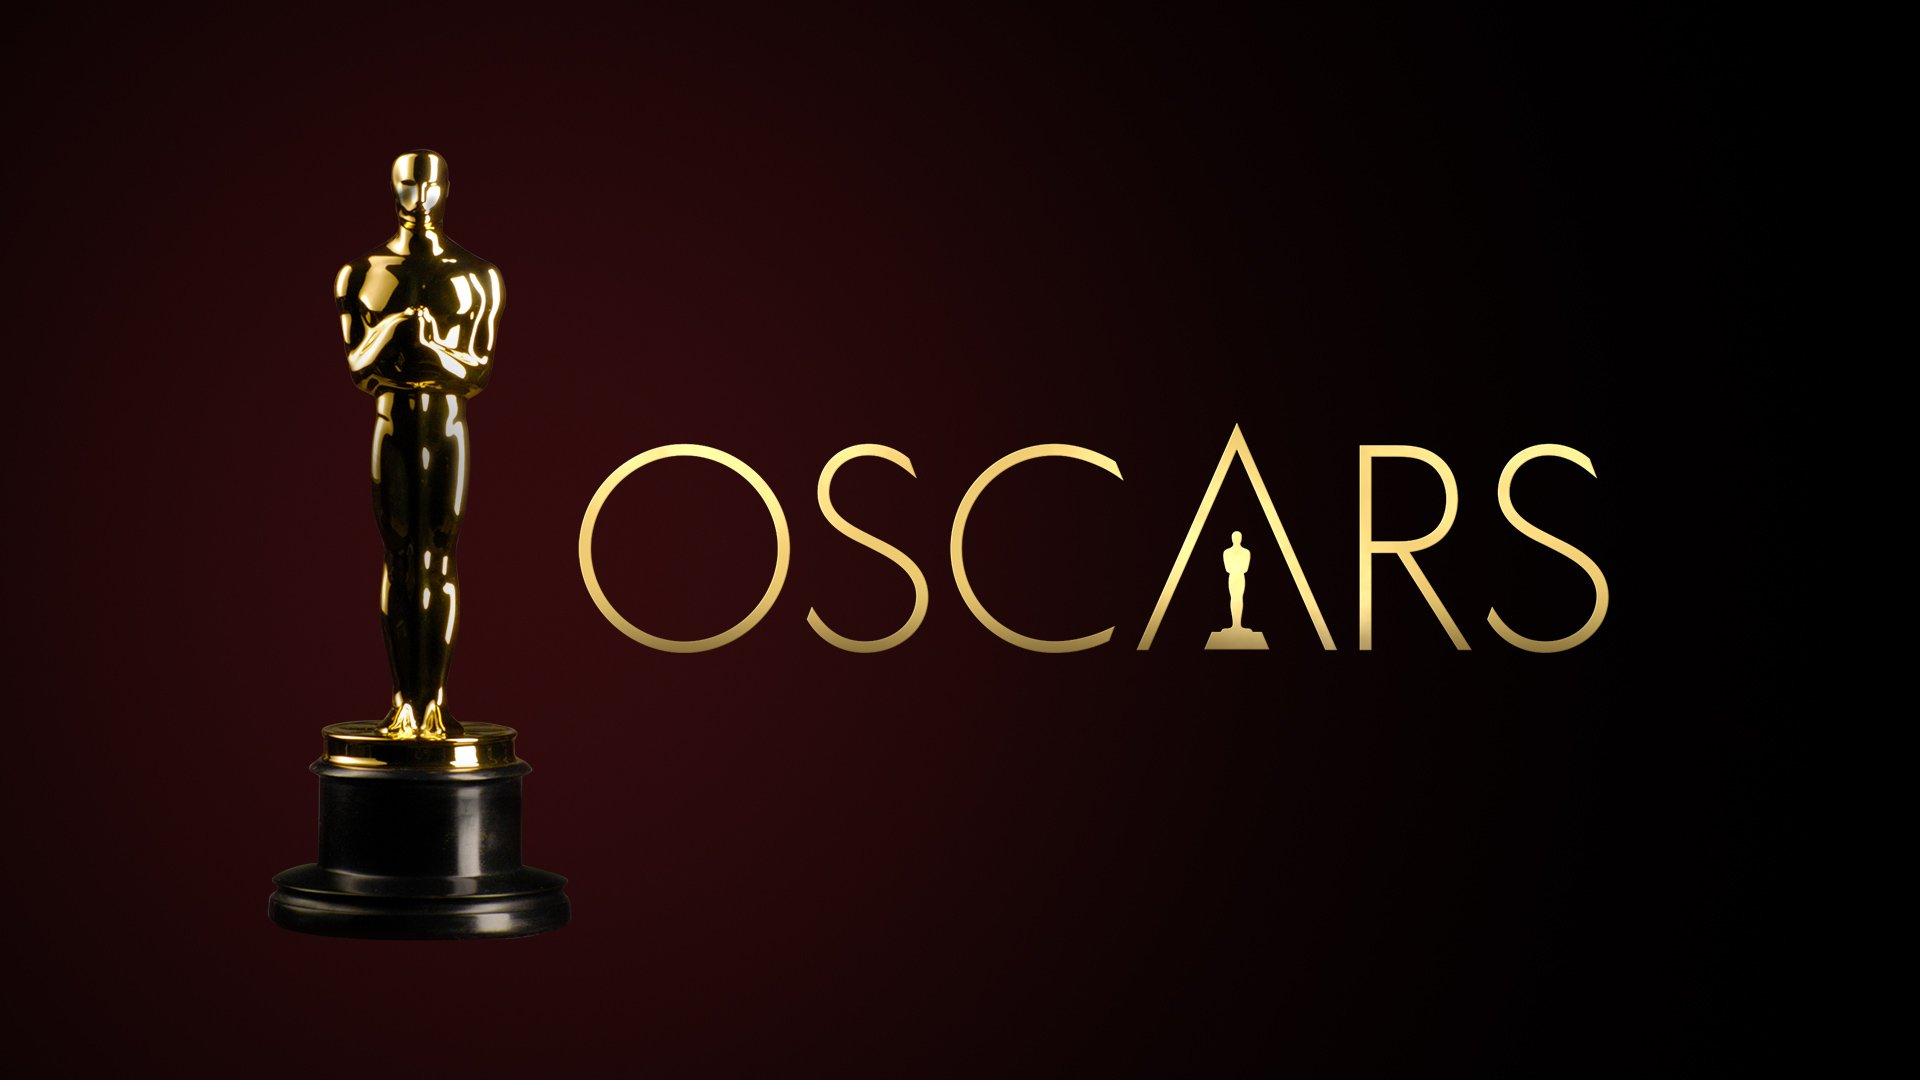

## 1. Подготовка к работе

Добавляем необходимые для работы библиотеки:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import random

In [4]:
oscar_movies= pd.read_csv('DataSet2.csv')

In [5]:
oscar_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

Датасет содержит следующие поля:
Film - название фильма
Oscar Year - год. в котором был номинирован на премию Оскар
Film Studio/Producer(s) - студия/продюссеры, которые занимались съемками фильма
Award - был ли награжден фильм, или только номинирован 
Year of Release - год выпуска
Movie Time - длительность фильма в минутах
Movie Genre - жанр фильма
IMDB Rating - рейтинг IMDB
IMDB Votes - кол-во голосов за фильм
Movie Info - информация о фильме...

In [6]:
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


Получили следующую характеристику исходных данных:

1. У фильмов, которые не зарегистрированы на Rotten Tomatoes отсутствует сразу несколько характеристик, отвечающих за рейтинг и прочие оценки (последние несколько столбцов)

2. Столбцы "Tomatometer Status" и "Tomatometer Rating" напрямую зависят друг от друга, так же как "Audience Status" и "Audience Rating"
Значение в столбце "Tomatometer Count" складывается из значений столбцов "Tomatometer Fresh Critics Count" и "Tomatometer Rotten Critics Count"

3. Значение в столбце "Audience Status" выставляется в зависимости от  значения в столбце "Audience Rating". Если во втором столбце находится число, меньшее 59 включительно, то значение столбца "Audience Status" = "Spilled", иначе "Upright".

In [7]:
oscar_movies.describe()

,Unnamed: 0,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,571.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000
mean,285.000000,1973.357268,124.894921,7.570403,87.503417,110.697039,82.428246,5.154145e+05,21.861048,98.471526,12.275626
std,164.977776,29.315738,26.322817,0.559652,11.690622,119.541406,10.927897,3.623107e+06,21.615492,107.798554,19.310232
min,0.000000,1927.000000,66.000000,5.600000,29.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,84.000000,25.000000,78.000000,6.637500e+03,5.000000,21.500000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,91.000000,54.000000,85.000000,3.716600e+04,11.000000,49.000000,5.000000
75%,427.500000,2001.000000,136.500000,7.900000,95.000000,199.000000,90.000000,1.255365e+05,45.000000,163.500000,15.000000
max,570.000000,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


Выводы из статистики:
1. таблица охватывает фильмы 1927-2021 годов выпуска
2. длительность фильмов составляет от 66 минут до 238 минут и в среднем составляет 124 минуты

In [8]:
oscar_movies.isna().sum().sort_values(ascending=False)

Critic Consensus                    232
Audience Status                     135
Authors                             134
Directors                           134
Movie Info                          133
Streaming Release Date              133
Audience Rating                     132
Audience Count                      132
Tomatometer Count                   132
Production Company                  132
Tomatometer Top Critics Count       132
Genres                              132
Tomatometer Fresh Critics Count     132
Content Rating                      132
Tomatometer Rotten Critics Count    132
Tomatometer Status                  132
Actors                              132
Original Release Date               132
Tomatometer Rating                  132
Unnamed: 0                            0
Film                                  0
IMDB Votes                            0
IMDB Rating                           0
Movie Genre                           0
Movie Time                            0


Отсюда видно, что 132 фильма не имеюn никакой информации об оценке критиков и зрителей. Зполним пустые текстовые поля значением "unknown"

In [9]:
columns_to_replace =['Movie Info', 'Genres', 'Critic Consensus', 'Content Rating', 'Directors', 'Authors', 'Actors', 'Production Company']

for row in columns_to_replace:
   oscar_movies[row] = oscar_movies[row].fillna('unknown')
oscar_movies.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [10]:
oscar_movies.isna().sum().sort_values(ascending=False)

Audience Status                     135
Streaming Release Date              133
Tomatometer Rotten Critics Count    132
Tomatometer Fresh Critics Count     132
Tomatometer Top Critics Count       132
Audience Count                      132
Audience Rating                     132
Tomatometer Count                   132
Tomatometer Rating                  132
Tomatometer Status                  132
Original Release Date               132
Unnamed: 0                            0
Film                                  0
Production Company                    0
Actors                                0
Authors                               0
Directors                             0
Content Rating                        0
Critic Consensus                      0
Genres                                0
Movie Info                            0
IMDB Votes                            0
IMDB Rating                           0
Movie Genre                           0
Movie Time                            0


Теперь перейдем к заполнению числовых данных. Пропущенные значения заполним средним значением.

In [11]:
oscar_movies.columns.tolist()

['Unnamed: 0',
 'Film',
 'Oscar Year',
 'Film Studio/Producer(s)',
 'Award',
 'Year of Release',
 'Movie Time',
 'Movie Genre',
 'IMDB Rating',
 'IMDB Votes',
 'Movie Info',
 'Genres',
 'Critic Consensus',
 'Content Rating',
 'Directors',
 'Authors',
 'Actors',
 'Original Release Date',
 'Streaming Release Date',
 'Production Company',
 'Tomatometer Status',
 'Tomatometer Rating',
 'Tomatometer Count',
 'Audience Status',
 'Audience Rating',
 'Audience Count',
 'Tomatometer Top Critics Count',
 'Tomatometer Fresh Critics Count',
 'Tomatometer Rotten Critics Count',
 'Film ID']

In [12]:
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [13]:
oscar_movies['Tomatometer Top Critics Count'] = oscar_movies['Tomatometer Top Critics Count'].map(lambda x: np.random.randint(0, 69) if pd.isna(x) else x)
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [14]:
oscar_movies['Tomatometer Fresh Critics Count'] = oscar_movies['Tomatometer Fresh Critics Count'].map(lambda x: np.random.randint(3, 495) if pd.isna(x) else x)
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,389.0,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,452.0,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,364.0,NaN,609887c2-877c-43a4-b88c-e40e31096a98


In [15]:
oscar_movies['Tomatometer Rotten Critics Count'] = oscar_movies['Tomatometer Rotten Critics Count'].map(lambda x: np.random.randint(0, 182) if pd.isna(x) else x)
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [16]:
oscar_movies['Tomatometer Count']=oscar_movies['Tomatometer Count'].fillna(oscar_movies['Tomatometer Fresh Critics Count']+oscar_movies['Tomatometer Rotten Critics Count'])

oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,400.0,NaN,NaN,NaN,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,474.0,NaN,NaN,NaN,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,510.0,NaN,NaN,NaN,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [17]:
oscar_movies['Audience Count'] = oscar_movies['Audience Count'].map(lambda x: np.random.randint(6, 35797640) if pd.isna(x) else x)
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,400.0,NaN,NaN,33322821.0,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,474.0,NaN,NaN,32183421.0,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,510.0,NaN,NaN,28952734.0,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [18]:
oscar_movies['Audience Rating'] = oscar_movies['Audience Rating'].map(lambda x: np.random.randint(21, 98) if pd.isna(x) else x)
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,400.0,NaN,31.0,33322821.0,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,474.0,NaN,55.0,32183421.0,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,510.0,NaN,31.0,28952734.0,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [19]:
oscar_movies.loc[(oscar_movies['Audience Rating']>59), 'Audience Status']='Upright'
oscar_movies.loc[(oscar_movies['Audience Rating']<=59), 'Audience Status']='Spilled'
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,400.0,Spilled,31.0,33322821.0,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,474.0,Spilled,55.0,32183421.0,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,510.0,Spilled,31.0,28952734.0,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [20]:
oscar_movies.to_csv(r'DataSet2_preprocessed.csv', index= True)

In [21]:
oscar_movies['Tomatometer Rating']=oscar_movies['Tomatometer Rating'].fillna((oscar_movies['Tomatometer Fresh Critics Count'])/(oscar_movies['Tomatometer Fresh Critics Count']+oscar_movies['Tomatometer Rotten Critics Count'])*100)
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.000000,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,97.250000,400.0,Spilled,31.0,33322821.0,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,95.358650,474.0,Spilled,55.0,32183421.0,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.000000,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,71.372549,510.0,Spilled,31.0,28952734.0,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [22]:
oscar_movies.to_csv(r'DataSet2_preprocessed.csv', index= True)

таблицу со статистической характеристикой сохранила как отедльный файл, чтобы можно было беспрепятсве

In [23]:
oscar_movies.loc[(oscar_movies['Tomatometer Rating']>=60), 'Tomatometer Status']='Fresh'
oscar_movies.loc[(oscar_movies['Tomatometer Rating']<60), 'Tomatometer Status']='Rotten'
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Fresh,93.000000,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,Fresh,97.250000,400.0,Spilled,31.0,33322821.0,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,Fresh,95.358650,474.0,Spilled,55.0,32183421.0,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.000000,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,Fresh,71.372549,510.0,Spilled,31.0,28952734.0,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [24]:
oscar_movies.to_csv(r'DataSet2_preprocessed.csv', index= True)

In [25]:
oscar_movies['Streaming Release Date'].fillna("0000-00-00",inplace = True)
oscar_movies['Original Release Date'].fillna("0000-00-00",inplace = True)
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Fresh,93.000000,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,Fresh,97.250000,400.0,Spilled,31.0,33322821.0,58.0,389.0,11.0,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,Fresh,95.358650,474.0,Spilled,55.0,32183421.0,13.0,452.0,22.0,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.000000,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,Fresh,71.372549,510.0,Spilled,31.0,28952734.0,1.0,364.0,146.0,609887c2-877c-43a4-b88c-e40e31096a98


In [26]:
oscar_movies.to_csv(r'DataSet2_preprocessed.csv', index= True)

In [27]:
oscar_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        571 non-null    object 
 11  Genres                            571 non-null    object 
 12  Critic C

In [28]:
oscar_movies['Tomatometer Rating'] = oscar_movies['Tomatometer Rating'].astype(int)
oscar_movies['Tomatometer Count'] = oscar_movies['Tomatometer Count'].astype(int)
oscar_movies['Audience Rating'] = oscar_movies['Audience Rating'].astype(int)
oscar_movies['Audience Count'] = oscar_movies['Audience Count'].astype(int)
oscar_movies['Tomatometer Top Critics Count'] = oscar_movies['Tomatometer Top Critics Count'].astype(int)
oscar_movies['Tomatometer Fresh Critics Count'] = oscar_movies['Tomatometer Fresh Critics Count'].astype(int)
oscar_movies['Tomatometer Rotten Critics Count'] = oscar_movies['Tomatometer Rotten Critics Count'].astype(int)

oscar_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        571 non-null    object 
 11  Genres                            571 non-null    object 
 12  Critic C

In [29]:
oscar_movies.head(5)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Fresh,93,46,Upright,78,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,Fresh,97,400,Spilled,31,33322821,58,389,11,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,Fresh,95,474,Spilled,55,32183421,13,452,22,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33,24,Spilled,21,1813,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,Fresh,71,510,Spilled,31,28952734,1,364,146,609887c2-877c-43a4-b88c-e40e31096a98


In [30]:
oscar_movies.duplicated().sum()

0

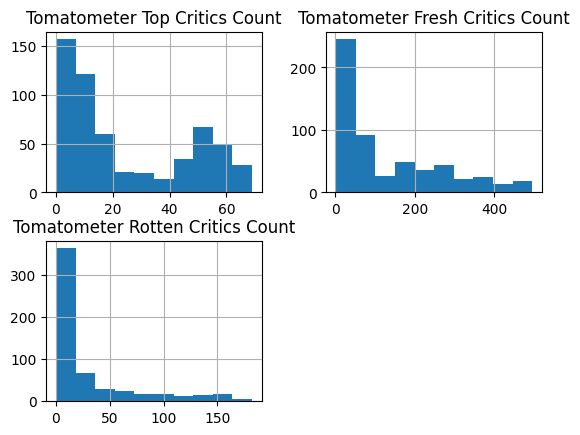

In [31]:
columns = [['Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Rotten Critics Count']]

for column in columns:
    oscar_movies.hist(column)

In [32]:
outlier = oscar_movies[['Tomatometer Top Critics Count','Tomatometer Fresh Critics Count','Tomatometer Rotten Critics Count']]
outlier

,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,9,43,3
1,58,389,11
2,13,452,22
3,7,8,16
4,1,364,146
...,...,...,...
566,0,179,124
567,39,454,83
568,52,217,54
569,17,168,50


In [33]:
Q1 = outlier.quantile(0.25)
Q1

Tomatometer Top Critics Count        6.0
Tomatometer Fresh Critics Count     27.0
Tomatometer Rotten Critics Count     2.0
Name: 0.25, dtype: float64

In [34]:
Q3 = outlier.quantile(0.75)
Q3

Tomatometer Top Critics Count        49.0
Tomatometer Fresh Critics Count     224.0
Tomatometer Rotten Critics Count     34.0
Name: 0.75, dtype: float64

In [35]:
IQR = Q3-Q1
oscar_movies_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
oscar_movies_filtered

,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,9,43,3
1,58,389,11
2,13,452,22
3,7,8,16
5,61,189,49
...,...,...,...
564,12,60,14
565,0,392,21
568,52,217,54
569,17,168,50


In [38]:
index_list = list(oscar_movies_filtered.index.values)

oscar_movies_filtered = oscar_movies[oscar_movies.index.isin(index_list)]
oscar_movies_filtered.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Fresh,93,46,Upright,78,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,Fresh,97,400,Spilled,31,33322821,58,389,11,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,Fresh,95,474,Spilled,55,32183421,13,452,22,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33,24,Spilled,21,1813,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",...,Fresh,79,238,Spilled,48,17305652,61,189,49,689f22d5-a700-4ce1-b9be-65652f32c186


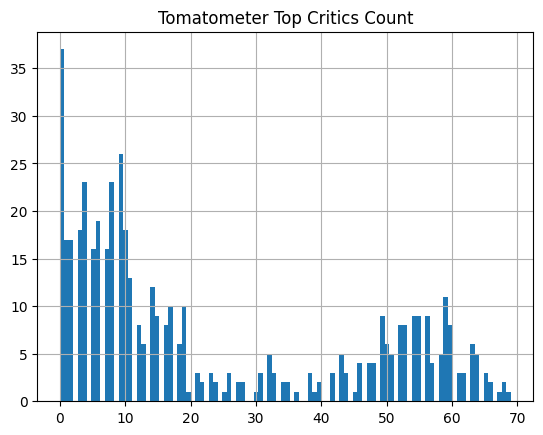

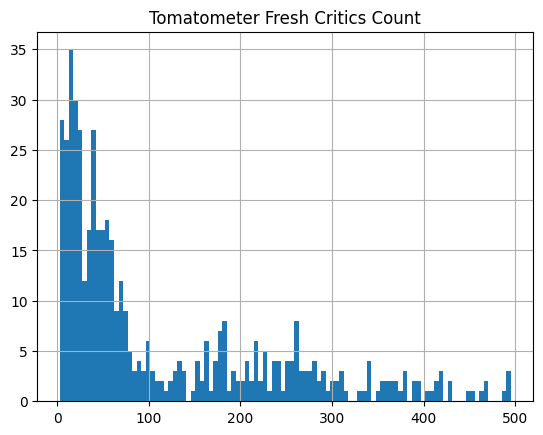

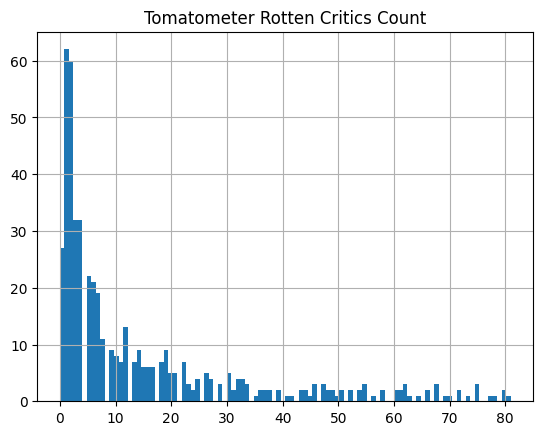

In [39]:
filtered_outlier = oscar_movies_filtered[['Tomatometer Top Critics Count','Tomatometer Fresh Critics Count','Tomatometer Rotten Critics Count']]

for col in filtered_outlier:
    oscar_movies_filtered.hist(col, bins=100)

[[<Axes: title={'center': 'Tomatometer Top Critics Count'}>]]
[[<Axes: title={'center': 'Tomatometer Top Critics Count'}>]]


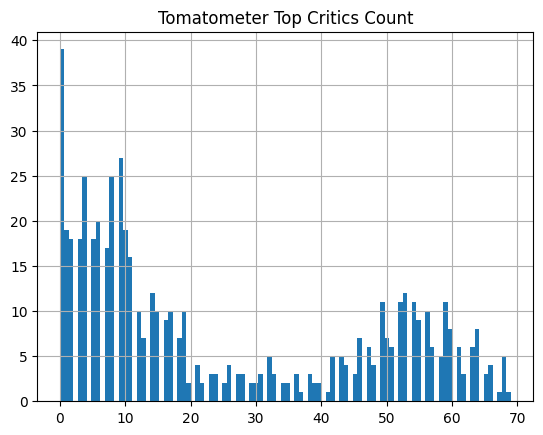

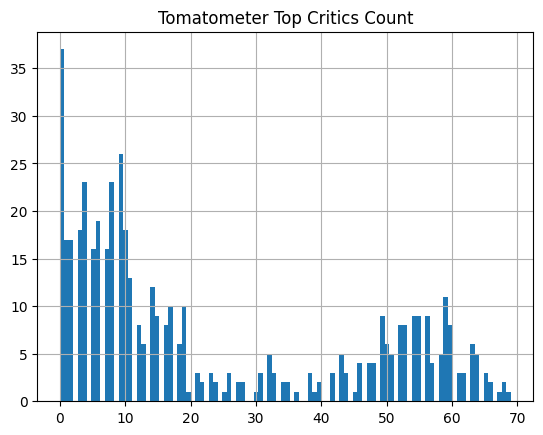

In [41]:
# анализ без выбросов
print (oscar_movies.hist('Tomatometer Top Critics Count', bins=100))
print (oscar_movies_filtered.hist('Tomatometer Top Critics Count', bins=100))

[[<Axes: title={'center': 'Tomatometer Fresh Critics Count'}>]]
[[<Axes: title={'center': 'Tomatometer Fresh Critics Count'}>]]


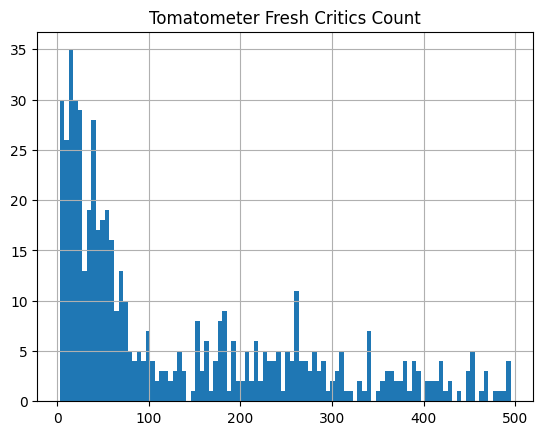

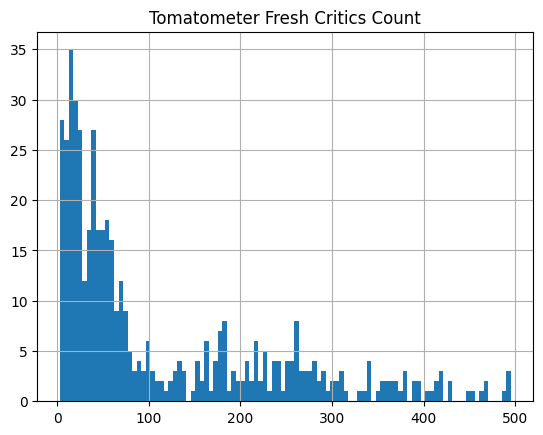

In [42]:
print (oscar_movies.hist('Tomatometer Fresh Critics Count', bins=100))
print (oscar_movies_filtered.hist('Tomatometer Fresh Critics Count', bins=100))

[[<Axes: title={'center': 'Tomatometer Rotten Critics Count'}>]]
[[<Axes: title={'center': 'Tomatometer Rotten Critics Count'}>]]


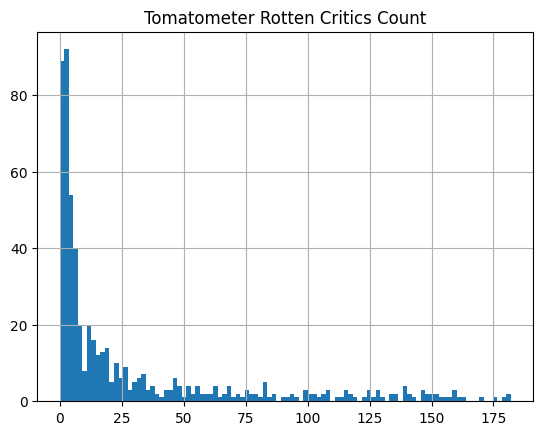

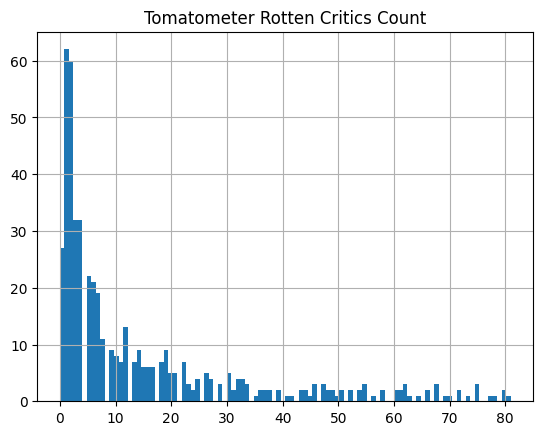

In [43]:
print (oscar_movies.hist('Tomatometer Rotten Critics Count', bins=100))
print (oscar_movies_filtered.hist('Tomatometer Rotten Critics Count', bins=100))